## Load Features and Compute MI

In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

from information.mutual_information_calculator import MutualInformationCalculator

In [3]:
# load input, label and features
file_dir = "./log_fedmia/iid_ib/cifar10_K10_N5000_ResNet18_IB_layer_iblayer0_beta0.001_dynamicNone_defnone_iid$1_$1_$sgd_local1_s1/layer_features"

# create calculator to compute MI
device = 'cuda' if torch.cuda.is_available() else 'cpu'
mi_calculator = MutualInformationCalculator(device=device, num_layers=1)

# layers ['layer1.0.ib', 'layer1.0.bn2', 'layer1.1.ib', 'layer1.1.bn2', 'layer1.1', 'layer1', 'layer2', 'layer3', 'layer4']
for epoch in range(0, 101, 5):
    if epoch == 0:
        epoch = 1
    mi_datas = torch.load(file_dir + f"/client_0_features_epoch_{epoch}.pkl")

    input_x = torch.from_numpy(mi_datas['input_data'])
    label_y = torch.from_numpy(mi_datas['labels'])
    features_z = mi_datas['layer_features']['layer1.0.ib']

    # reshape feature data
    feature_z_data = np.array(features_z)
    feature_z_data = torch.from_numpy(feature_z_data)
    feature_z_data = feature_z_data.reshape(-1, *feature_z_data.shape[2:])

    

    I_XT, I_TY = mi_calculator.compute_mutual_information(input_x, label_y, [feature_z_data], epoch=epoch)
    print(f'epoch {epoch} || IXZ: {I_XT}, IZY: {I_TY}')



0 tensor(0., device='cuda:0')
epoch 1 || IXZ: tensor([7.6439]), IZY: tensor([3.3076])
0 tensor(0., device='cuda:0')
epoch 5 || IXZ: tensor([7.6439]), IZY: tensor([3.3039])
0 tensor(0., device='cuda:0')
epoch 10 || IXZ: tensor([7.6439]), IZY: tensor([3.3074])
0 tensor(0., device='cuda:0')
epoch 15 || IXZ: tensor([7.6439]), IZY: tensor([3.2960])
0 tensor(0., device='cuda:0')
epoch 20 || IXZ: tensor([7.6439]), IZY: tensor([3.2893])
0 tensor(0., device='cuda:0')
epoch 25 || IXZ: tensor([7.6439]), IZY: tensor([3.2650])


KeyboardInterrupt: 

## test MI

In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

from information.mutual_information_calculator import MutualInformationCalculator

In [2]:
import matplotlib.pyplot as plt
layer_order =  {0:'layer1', 1:'layer1.0.ib', 2:'layer1.0.bn2', 3:'layer1.1', 4:'layer1.1.ib', 5:'layer1.1.bn2', 6:'layer2', 7:'layer2.1.conv2', 8:'layer3', 9:'layer3.1.conv2', 10:'layer4', 11:'layer4.1.conv2', 12:'linear'}
# layer_order =  {0:'layer1', 1:'layer1.0.ib', 2:'layer1.0.bn2', 3:'layer1.1', 4:'layer1.1.ib', 5:'layer1.1.bn2', 6:'layer2', 7:'layer3', 8:'layer4', 9:'linear'}
def plot_IP(mi_results, client_idx, layer_idx):
    IXZ = mi_results[:, 0]  # X 軸
    IZY = mi_results[:, 1]  # Y 軸
    iters = np.arange(len(IXZ))  # 迭代次數

    # 畫 Information Plane，顏色使用紅色漸層 (Reds)
    plt.figure(figsize=(7, 6))
    sc = plt.scatter(IXZ, IZY, c=iters, cmap="Reds", s=30, marker="o", edgecolors="k", linewidths=0.3)

    # 座標軸 & 標題
    plt.xlabel("I(X;Z)")
    plt.ylabel("I(Z;Y)")
    plt.title(f"Information Plane - Client {client_idx} {layer_order[layer_idx]} Layer")
    plt.colorbar(sc, label="Iteration")
    plt.grid(True, linestyle="--", alpha=0.6)

    # 確保輸出資料夾存在
    save_dir = f"./MI_result/{layer_order[layer_idx]}"
    os.makedirs(save_dir, exist_ok=True)

    # 儲存圖片
    # plt.savefig(f"{save_dir}/client{client_idx}_{layer_order[layer_idx]}.jpg", dpi=300, bbox_inches="tight")
    plt.show()

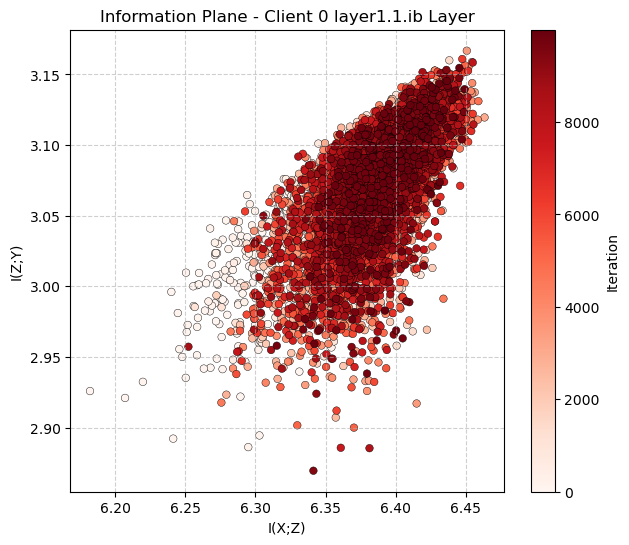

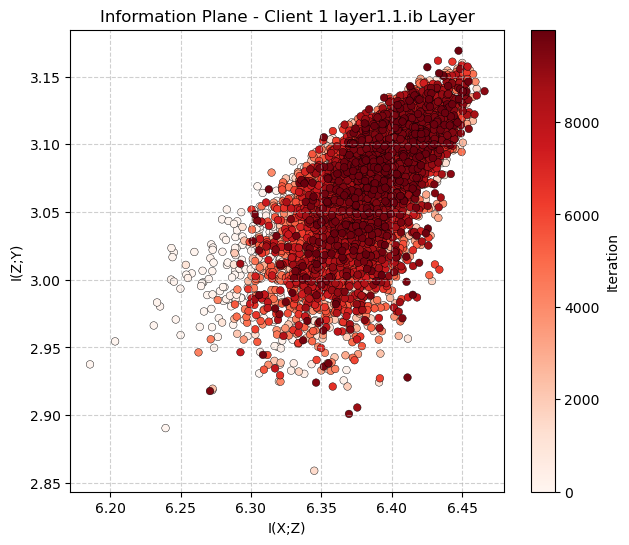

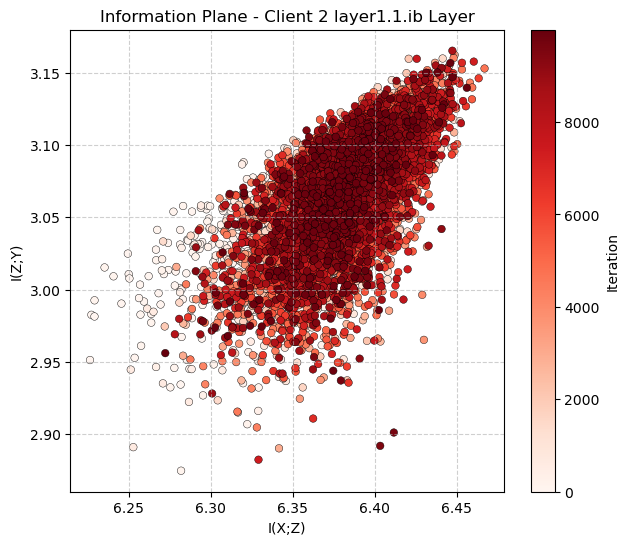

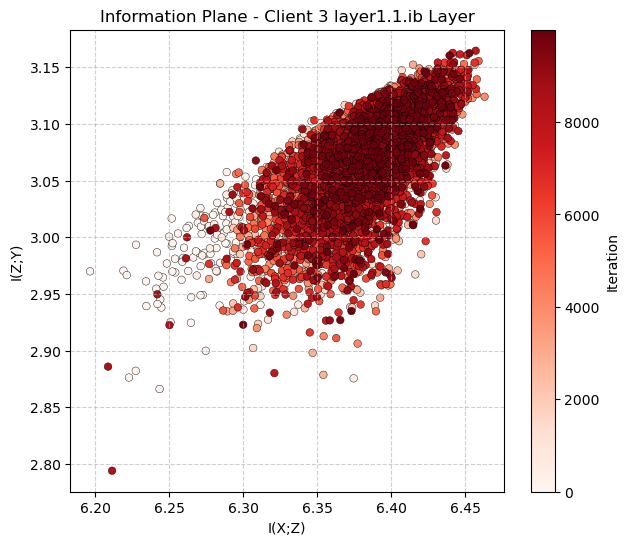

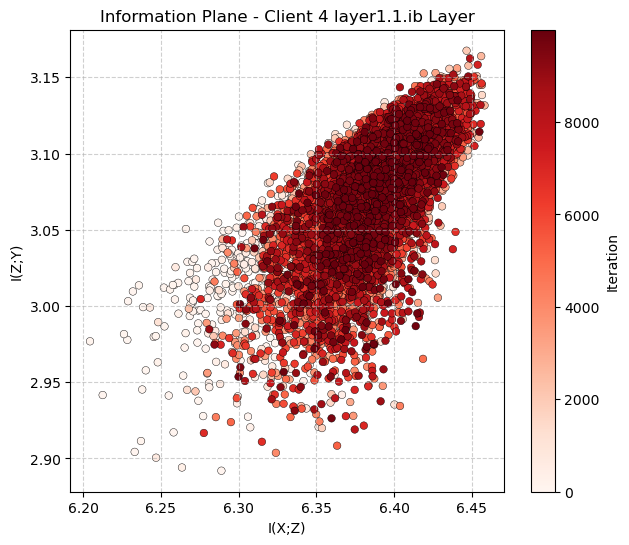

In [14]:
# load input, label and features
# file_dir = "./log_fedmia/iid_ib_MI/cifar10_K10_N5000_ResNet18_IB_layer_iblayer0_beta0.001_dynamicNone_defnone_iid$1_$1_$sgd_local1_s1/mi_results"
# file_dir = "./log_fedmia/noniid_ib_MI/cifar10_K10_N5000_ResNet18_IB_layer_iblayer0_beta0.001_dynamicir_defnone_iid$0_$10.0_$sgd_local4_s1/mi_results"
file_dir = "./log_fedmia/iid_ib_MI/cifar10_K5_N5000_VGG16_defnone_iid$1_$1_$sgd_local1_s1/mi_results"
layer_idx = 4
client_idx = 6
for client_idx in range(5):
    mi_results = []
    for ep in range(1, 101):
        data = torch.load(file_dir + f"/client_{client_idx}_mi_epoch_{ep}.pkl")
        mi_datas = data['mi_results']

        for iter in mi_datas:
            ixz = mi_datas[iter]['IXZ'][layer_idx]
            izy = mi_datas[iter]['IZY'][layer_idx]

            mi_results.append([ixz, izy])
        # print(len(mi_results))
    mi_results = np.array(mi_results)

    plot_IP(mi_results, client_idx, layer_idx)
